In [14]:
import pandas as pd 
data=pd.read_csv('CC GENERAL.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [15]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode()[0],inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [16]:
data=data.drop("CUST_ID", axis=1)


In [17]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

In [18]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


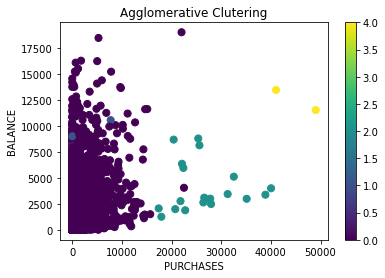

In [25]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data["PURCHASES"] , data["BALANCE"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("BALANCE")
plt.colorbar(scatter)

In [20]:
#Kmean exemple:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [21]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,2
2,0
3,0
4,4
...,...
8945,4
8946,4
8947,4
8948,4


In [22]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[1.65494809e+03 9.05569473e-01 1.51304429e+03 9.45739817e+02
  5.67698718e+02 8.13031011e+02 5.87831726e-01 3.37622530e-01
  4.07327694e-01 1.14705882e-01 2.66707367e+00 2.15144485e+01
  6.98212713e+03 2.02836865e+03 6.37713650e+02 1.97623568e-01
  1.17659748e+01]
 [4.82080345e+03 9.09931025e-01 1.14382085e+04 8.18784780e+03
  3.25054712e+03 4.99019925e+03 7.68862339e-01 6.29431746e-01
  6.15417508e-01 2.06498992e-01 8.49152542e+00 8.87966102e+01
  1.26572034e+04 1.86548118e+04 2.38130195e+03 3.43899305e-01
  1.18220339e+01]
 [5.61543836e+03 9.61052508e-01 1.38353825e+03 8.42839290e+02
  5.40778189e+02 4.03736821e+03 4.52429864e-01 2.47745180e-01
  3.34396512e-01 3.42575327e-01 1.01538462e+01 1.96213018e+01
  1.08707746e+04 4.01243432e+03 1.95895703e+03 6.38992899e-02
  1.16591716e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03

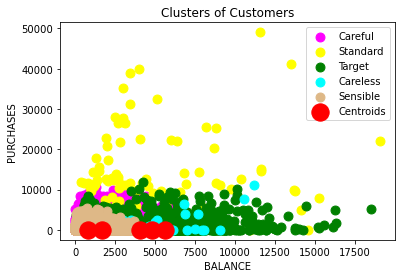

In [28]:
plt.scatter(data["BALANCE"][labels[0] == 0],          
            data["PURCHASES"][labels[0] == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][labels[0] == 1],
           data["PURCHASES"][labels[0] == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][labels[0] == 2],
           data["PURCHASES"][labels[0] == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][labels[0] == 3], 
           data["PURCHASES"][labels[0] == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["BALANCE"][labels[0] == 4], 
           data["PURCHASES"][labels[0] == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [30]:
sum_of_squared_distances = []
k=range(1,15)
for k in k:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    sum_of_squared_distances.append(km.inertia_)

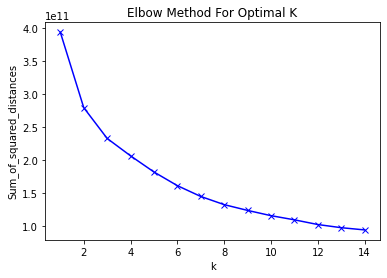

In [31]:
k=range(1,15)
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=4,random_state=40)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=40)

In [33]:
labels=pd.DataFrame(kmeans.labels_)

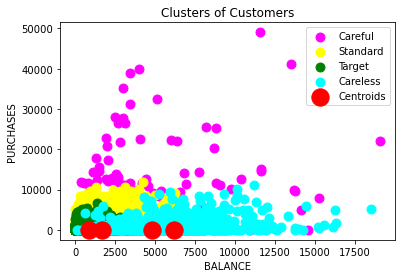

In [35]:
plt.scatter(data["BALANCE"][labels[0] == 0],          
            data["PURCHASES"][labels[0] == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][labels[0] == 1],
           data["PURCHASES"][labels[0] == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][labels[0] == 2],
           data["PURCHASES"][labels[0] == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][labels[0] == 3], 
           data["PURCHASES"][labels[0] == 3],s=80,c='cyan',label='Careless')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()